## Load Libraries

In [1]:
import os
import re
import cv2  

from ast import literal_eval

In [2]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
filename="iamDB/data/ascii/words.txt"

In [4]:
word_id=[]
word_ok=[]
graylevel=[]
bounding_box=[]
grammatical_tag=[]
transcription=[]

with open(filename) as f:
    for line in f.read().splitlines():
        if line[0] != '#':
            items = line.split(' ')
            
            word_id.append(items[0])
            word_ok.append(items[1])
            graylevel.append(items[2])
            bounding_box.append([
                items[3],
                items[4],
                items[5],
                items[6]
            ])
            grammatical_tag.append(items[7])
            transcription.append(items[8:])

In [5]:
source_folder="iamDB/data/words/"

In [6]:
files = []
for (line, ok, transcript) in zip(word_id, word_ok, transcription):
    if ok == 'ok':
        items = line.split('-')

        first_folder=items[0]
        second_folder="-".join(items[0:2])
        file_name="%s.png"%line
        files.append(os.path.join(source_folder, first_folder, second_folder, file_name))

In [7]:
width=height=0.0
for file in files:
    try:
        img = cv2.imread(file)
        
        shape = img.shape
        width = max(shape[0], width)
        height = max(shape[1], height)
    except Exception as e:
        print(e)

'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'


In [15]:
len(files)

96456

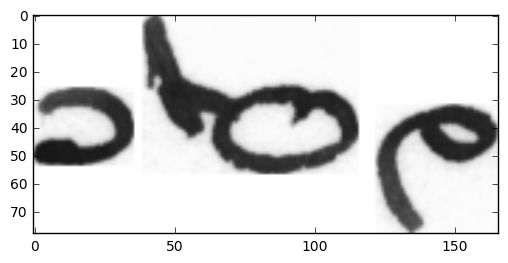

In [8]:
# load color (BGR) image
img = cv2.imread(files[3])
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [9]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [10]:
kernel_size=3
batch_size=128
input_shape=(224, 224, 3)
pool_size=(2,2)

In [12]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=input_shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(GlobalAveragePooling2D())
model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 54, 54, 32)        9248      
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               4389      
Total para

In [13]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

NameError: name 'train_tensors' is not defined